# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [2]:
# Importando os dados:
import pandas as pd

db = pd.read_csv('advertising.csv')
display(db)

# Tratamento de dados:
print(db.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

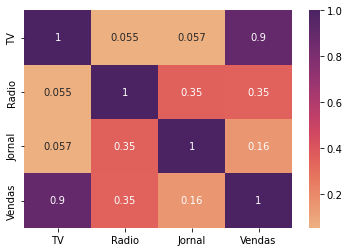

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(db.corr(), cmap='flare', annot = True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [9]:
# x, y ;

x = db[['TV', 'Radio', 'Jornal']]
y = db['Vendas']

# Separar os nossos dados em base de treino e base de testes:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 'Criar' uma AI
lin_model = LinearRegression()
tree_model = RandomForestRegressor()

# Treino:
lin_model.fit(x_train, y_train)
tree_model.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [11]:
# Qual melhor modelo?
prev_lin  = lin_model.predict(x_test)
prev_tree = tree_model.predict(x_test)

from sklearn import metrics

print(metrics.r2_score(y_test, prev_lin))
print(metrics.r2_score(y_test, prev_tree))

0.9053133293872445
0.9509614897029567


#### Visualização Gráfica das Previsões

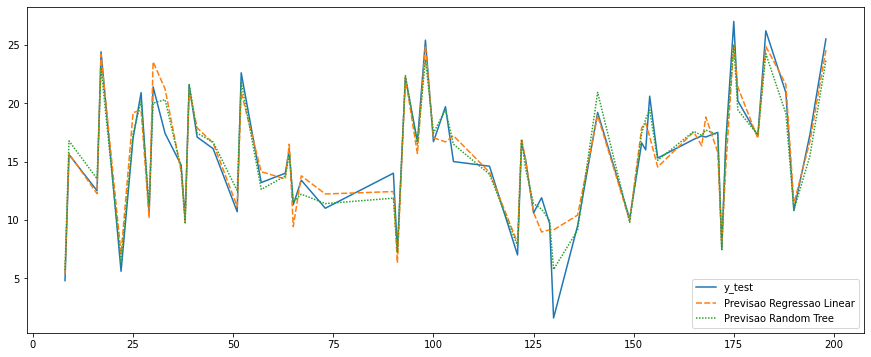

In [12]:
# RandomForest é melhor;

db_aux = pd.DataFrame()

db_aux['y_test'] = y_test
db_aux['Previsao Regressao Linear'] = prev_lin
db_aux['Previsao Random Tree'] = prev_tree

plt.figure(figsize=(15,6))
sns.lineplot(data = db_aux)
plt.show()

#### Como fazer uma nova previsão?

In [14]:
# Importar uma nova tabela com informações de propaganda para TV, Radio e Jornal;
new_db = pd.read_csv('novos.csv')
display(new_db)

# Faz o predict com o modelo escolhido:
prev = lin_model.predict(new_db)
print(prev)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 6.22833943  7.05314128 18.98546491]
